In [3]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#importing dataset using pandas
dataset = pd.read_csv('dataset.csv')

In [80]:
# To display first 5 rows of the dataset
print(dataset.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [59]:
#checking for summary information about the dataset and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
#checking for duplicates in the dataset
Clean_dataset = dataset[dataset.duplicated()]
Clean_dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [61]:
# To convert the given Total charges(object) to a numeric type

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors="coerce")
dataset['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [62]:
# D Missing values
dataset['TotalCharges'].isnull().sum()

11

In [63]:
#To display missing value in the TotalCharges column 
null = dataset[dataset['TotalCharges'].isnull()]
null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [83]:
# Removing missing values

dataset.dropna( how = 'any', inplace = True)

In [96]:
# Converting columns to category
dataset['gender'] = dataset['gender'].astype('category')
dataset['Partner'] = dataset['Partner'].astype('category')
dataset['Churn'] = dataset['Churn'].astype('category')
dataset['PhoneService'] = dataset['PhoneService'].astype('category')
dataset['MultipleLines'] = dataset['MultipleLines'].astype('category')
dataset['InternetService'] = dataset['InternetService'].astype('category')
dataset['PaymentMethod'] = dataset['PaymentMethod'].astype('category')
dataset['Contract'] = dataset['Contract'].astype('category')
dataset['TechSupport'] = dataset['TechSupport'].astype('category')

In [97]:
# Assigning numerical values and storing it in another columns
dataset['Gender_new'] = dataset['gender'].cat.codes
dataset['Partner_new'] = dataset['Partner'].cat.codes
dataset['Churn_new'] = dataset['Churn'].cat.codes
dataset['InternetService_new'] = dataset['InternetService'].cat.codes
dataset['PhoneService_new'] = dataset['PhoneService'].cat.codes
dataset['MultipleLines_new'] = dataset['MultipleLines'].cat.codes
dataset['PaymentMethod_new'] = dataset['PaymentMethod'].cat.codes
dataset['Contract_new'] = dataset['Contract'].cat.codes
dataset['TechSupport_new'] = dataset['TechSupport'].cat.codes

In [41]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    dataset[['Gender_new', 'Partner_new', 'Churn_new', 'InternetService_new', 'MultipleLines_new', 'PaymentMethod_new', 'Contract_new', 'TechSupport_new']]).toarray())

In [98]:
# Merge with main dataset
New_df = dataset.join(enc_data)
New_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,12,13,14,15,16,17,18,19,20,21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [108]:
#checking for descrptive statistics about the dataset 
dataset.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,Gender_new,Partner_new,Churn_new,InternetService_new,PhoneService_new,MultipleLines_new,PaymentMethod_new,Contract_new,TechSupport_new
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,0.504693,0.482509,0.265785,0.872582,0.903299,0.940557,1.573237,0.688567,0.796359
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,0.500014,0.499729,0.441782,0.737271,0.295571,0.948627,1.067504,0.832934,0.861674
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


In [13]:
#To see unique values in categorical columns
print(dataset['gender'].unique())
print(dataset['Partner'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [49]:
dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [106]:
dataset['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [52]:
dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [44]:
#To show the correlation between the columns
corr_matrix = dataset.corr()
corr_matrix

C:\Users\chijioke.ogbonna\AppData\Local\Temp\ipykernel_18304\1896789696.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


,SeniorCitizen,tenure,MonthlyCharges,Gender_new,Partner_new,Churn_new,InternetService_new,PhoneService_new,MultipleLines_new,PaymentMethod_new,Contract_new,TechSupport_new
SeniorCitizen,1.000000,0.016567,0.220173,-0.001874,0.016479,0.150889,-0.032310,0.008576,0.146185,-0.038551,-0.142554,-0.151268
tenure,0.016567,1.000000,0.247900,0.005106,0.379697,-0.352229,-0.030359,0.008448,0.343032,-0.370436,0.671607,0.322942
MonthlyCharges,0.220173,0.247900,1.000000,-0.014569,0.096848,0.193356,-0.323260,0.247398,0.433576,-0.193407,-0.074195,-0.008682
Gender_new,-0.001874,0.005106,-0.014569,1.000000,-0.001808,-0.008612,-0.000863,-0.006488,-0.006739,0.017352,0.000126,-0.006825
Partner_new,0.016479,0.379697,0.096848,-0.001808,1.000000,-0.150448,0.000891,0.017706,0.142410,-0.154798,0.294806,0.126733
Churn_new,0.150889,-0.352229,0.193356,-0.008612,-0.150448,1.000000,-0.047291,0.011942,0.038037,0.107062,-0.396713,-0.282492
InternetService_new,-0.032310,-0.030359,-0.323260,-0.000863,0.000891,-0.047291,1.000000,0.387436,-0.109216,0.086140,0.099721,-0.026047
PhoneService_new,0.008576,0.008448,0.247398,-0.006488,0.017706,0.011942,0.387436,1.000000,-0.020538,-0.004184,0.002247,-0.019158
MultipleLines_new,0.146185,0.343032,0.433576,-0.006739,0.142410,0.038037,-0.109216,-0.020538,1.000000,-0.176793,0.110842,0.011466
PaymentMethod_new,-0.038551,-0.370436,-0.193407,0.017352,-0.154798,0.107062,0.086140,-0.004184,-0.176793,1.000000,-0.227543,-0.104670


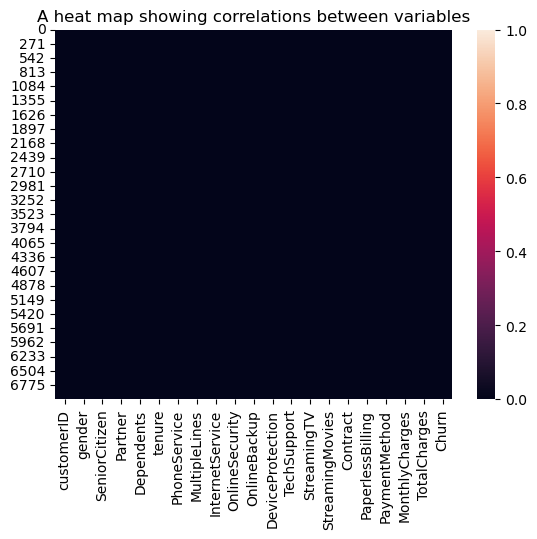

In [82]:
# Visualizing the correlation between variables
sns.heatmap(dataset.isnull())
plt.title('A heat map showing correlations between variables')
plt.show()

In [110]:
import scipy.stats as stats
churned_customers = dataset[dataset["Churn"]=='Yes']
non_churned_customers = dataset[dataset["Churn"]=='No'] 
stats.ttest_ind(a=churned_customers["MonthlyCharges"],b=non_churned_customers["MonthlyCharges"], equal_var=False)

Ttest_indResult(statistic=18.34091879095257, pvalue=2.6573571445160277e-72)

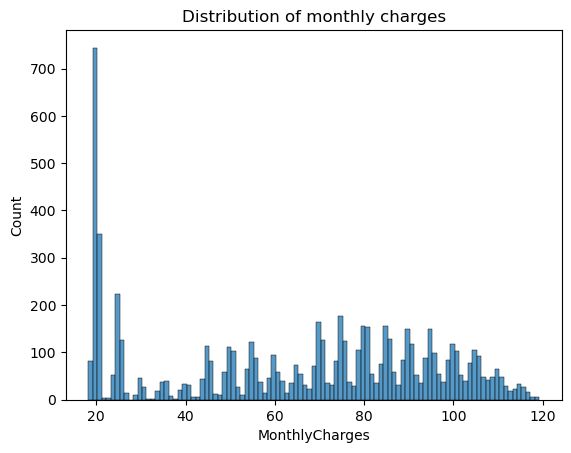

In [94]:
#Plotting a histogram of Monthly charges
sns.histplot(data= dataset, x="MonthlyCharges", binwidth=1)
plt.title('Distribution of monthly charges')
plt.show()

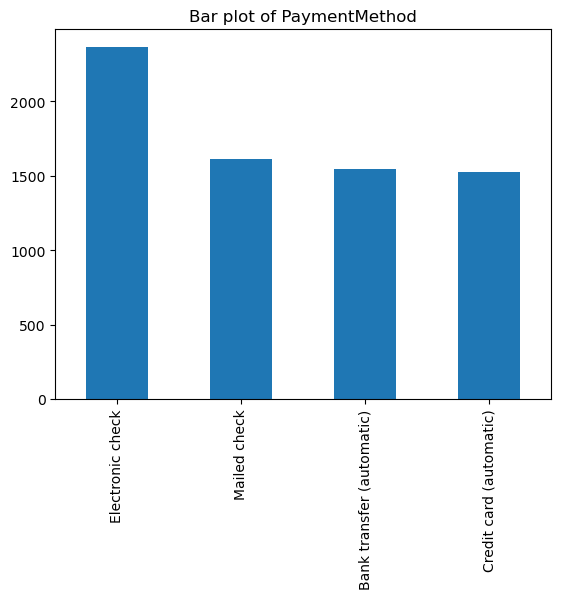

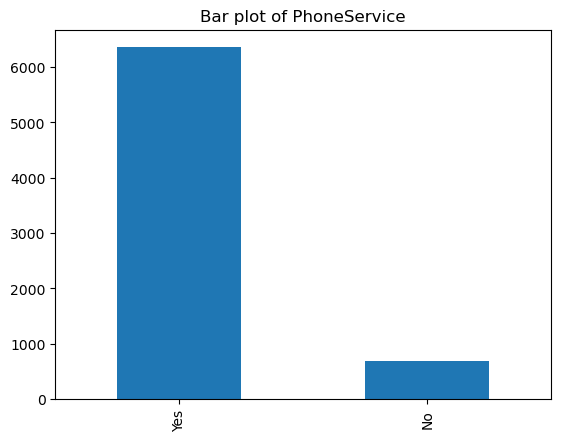

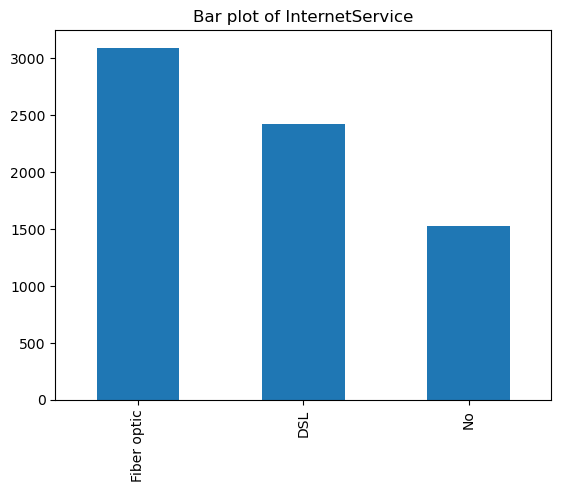

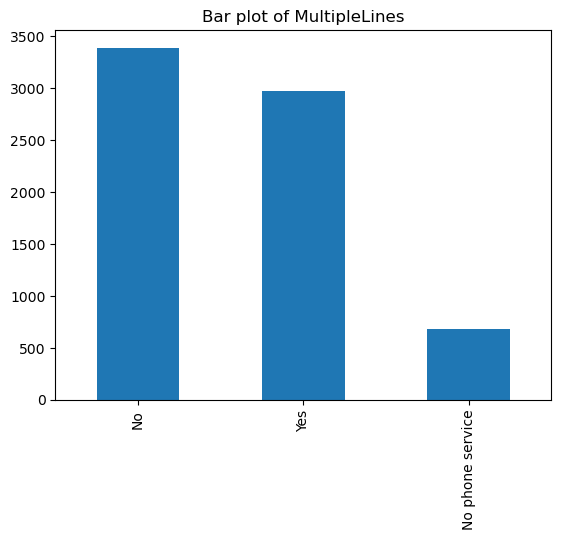

In [34]:
#Plotting a bar plots of payment methods by Monthly charges 

key_variables = ['PaymentMethod','PhoneService','InternetService', 'MultipleLines']
for variable in key_variables:
    dataset[variable].value_counts().plot.bar() 
    plt.title(f'Bar plot of {variable}')
    plt.show()

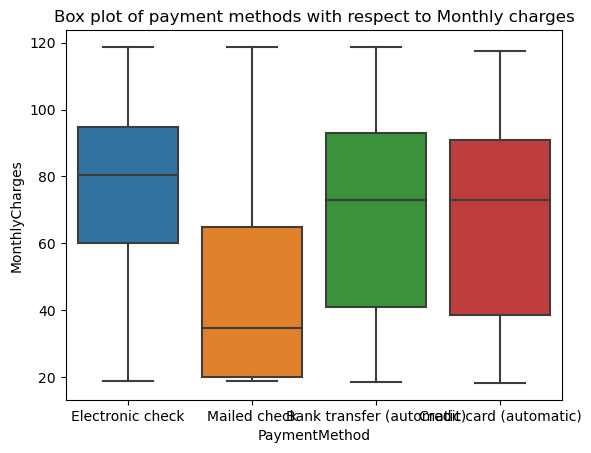

In [16]:
#Plotting a b plots of payment methods by Monthly charges
sns.boxplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = dataset)
plt.title('Box plot of payment methods with respect to Monthly charges')
plt.show()

In [65]:
# Categorical Variables
# Bar plots
# making a function to plot categorical data according to target

import math

def plot_categorical_to_target(dataset, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.countplot(x = column, data = dataset, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

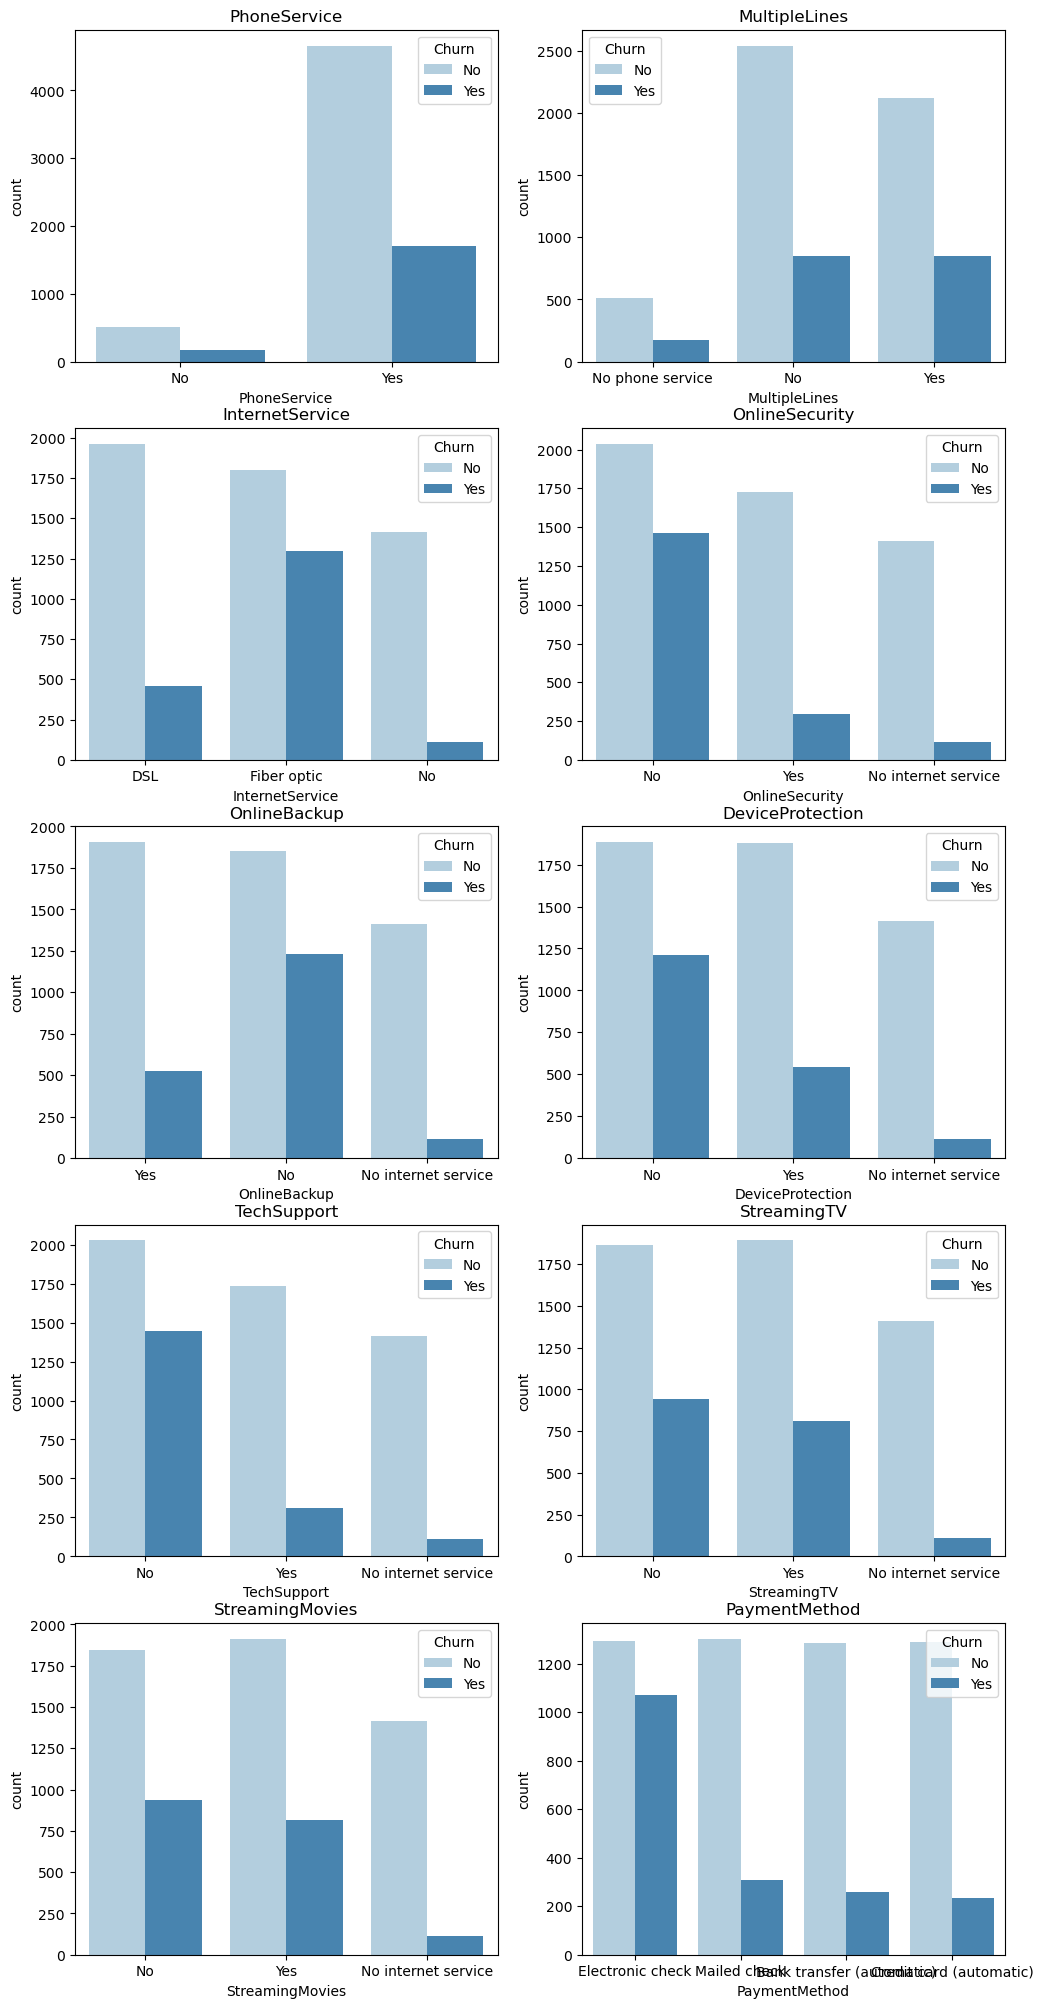

In [81]:
# To display the relationship between customer services and churn status
customer_services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"]
plot_categorical_to_target(dataset, customer_services, "Churn")

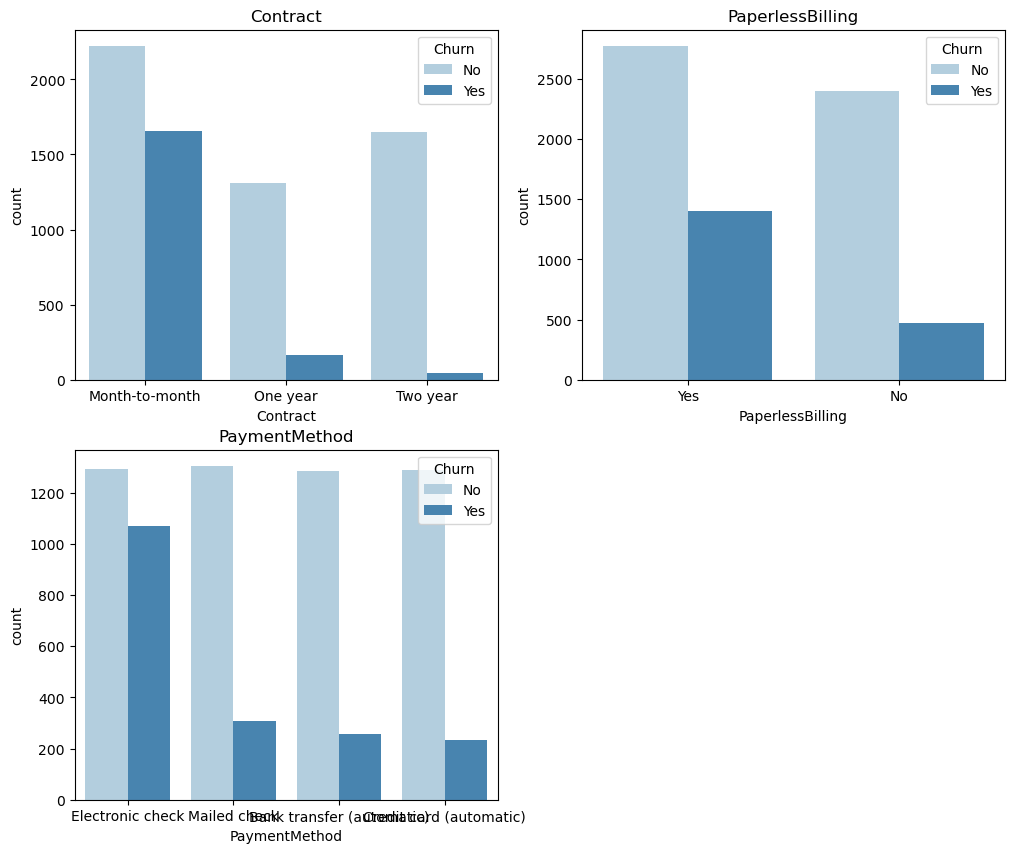

In [68]:
#To display the relationshop between customer account category and churn status
customer_account_cat = ["Contract", "PaperlessBilling", "PaymentMethod"]
plot_categorical_to_target(dataset, customer_account_cat, "Churn")

In [70]:
# Numerical variables
# Histogram plots

def histogram_plots(dataset, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(dataset[column][dataset[target]=="Yes"], fill = True)
        ax = sns.kdeplot(dataset[column][dataset[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn", "No Churn"], loc='upper right')
        plt.savefig("numerical_variables.png", dpi=300)
    return plt.show() 

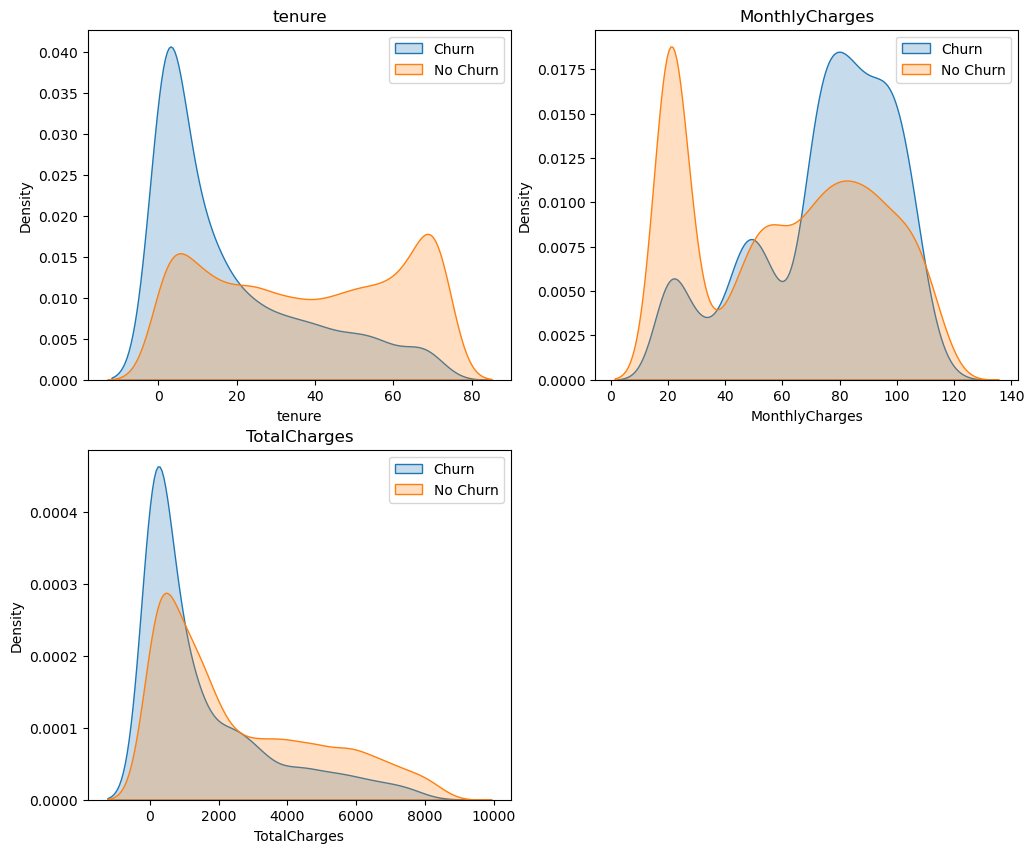

In [71]:
# To dsiplay the relationship btween churn status and customer usage patterns 
customer_account_num = ["tenure", "MonthlyCharges", "TotalCharges"]
histogram_plots(dataset, customer_account_num, "Churn")

In [72]:
# Outliers checking with Box plots

def outlier_check_boxplot(dataset, numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = dataset, palette="Blues")
        ax.set_title(column)
    plt.savefig("outliers_check.png", dpi=300)
    return plt.show()

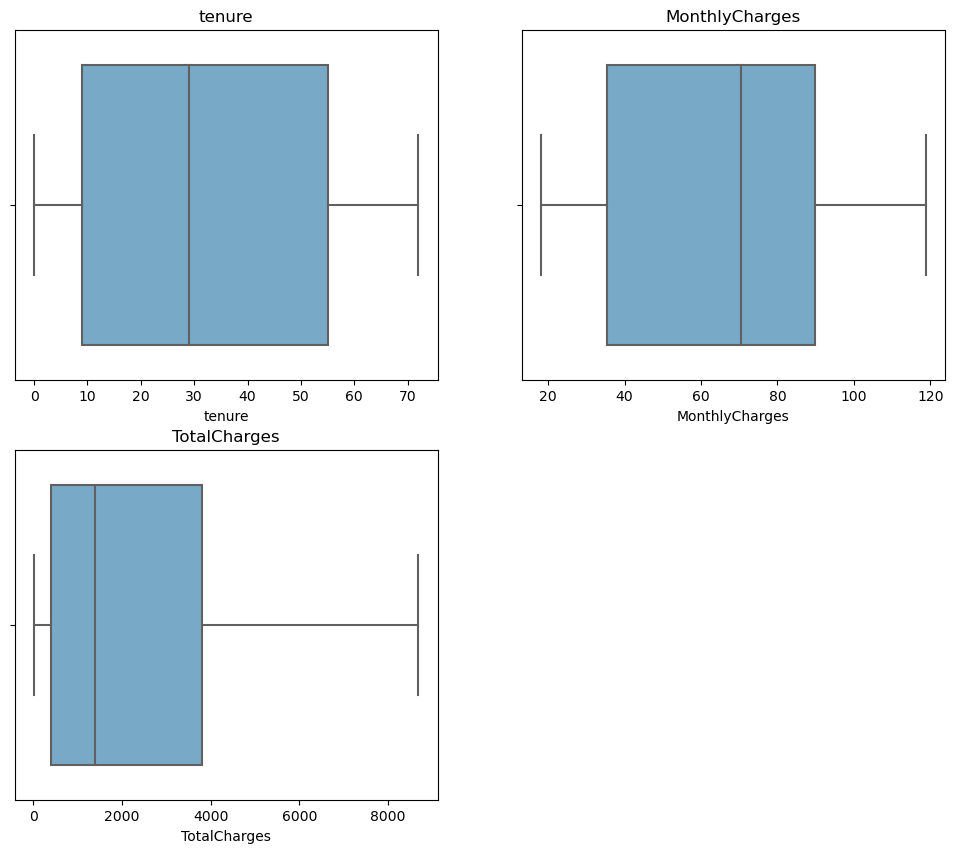

In [73]:
# Box Plot showing the different customer usage patterns

numerical_values = ["tenure", "MonthlyCharges", "TotalCharges"]
outlier_check_boxplot(dataset, numerical_values)

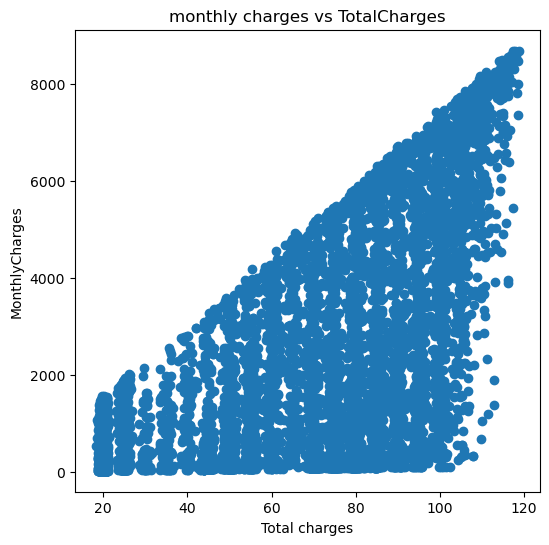

In [75]:
# scatter plot exploring relationships between Monthly charges and Total charges
plt.figure(figsize = (6,6))
plt.scatter(dataset["MonthlyCharges"], dataset["TotalCharges"])
plt.xlabel("Total charges")
plt.ylabel("MonthlyCharges")
plt.title("monthly charges vs TotalCharges")
plt.show()

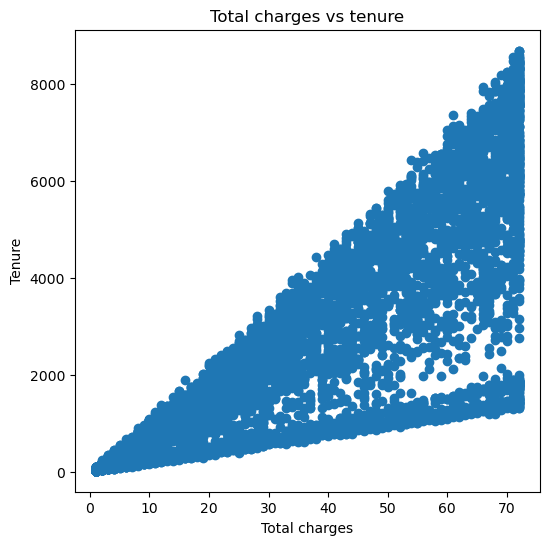

In [77]:
# Scatter plot of Total charges vs tenure
plt.figure(figsize = (6,6))
plt.scatter(dataset["tenure"], dataset["TotalCharges"])
plt.xlabel("Total charges")
plt.ylabel("Tenure")
plt.title("Total charges vs tenure")
plt.show()

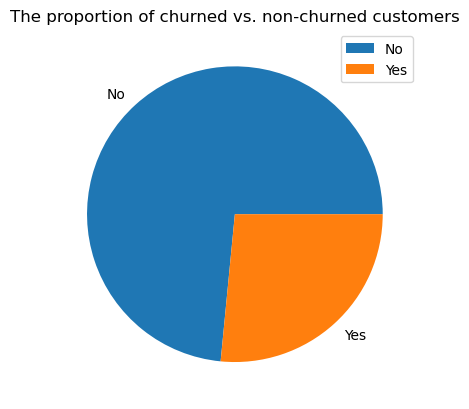

In [19]:
#Pie charts to visualize the proportion of churned vs. non-churned customers
sizes = dataset['Churn_new'].value_counts(sort = True)
labels = np.unique(dataset.Churn)
plt.title("The proportion of churned vs. non-churned customers")
plt.pie(sizes, labels = labels)
plt.legend()
plt.show()